<a href="https://drive.google.com/file/d/1n7Pj2IQd9rrED4miEZHCYje22P_yCYIA/view?usp=sharing" target="_blank" >
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>

In [11]:
# Import the necessary libraries
import numpy as np
import pandas as pd
from PIL import Image
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.datasets import mnist
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.utils import to_categorical, plot_model
%matplotlib inline


In [12]:
# Function to get the MNIST data
def get_data():

  # Load the MNIST data from keras datasets
  (_,_), (X, y) = mnist.load_data()

  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.1, random_state=10)
  
  # Get indices of train and test data where label is either 4 or 9
  train_filter = np.logical_or(y_train == 4, y_train == 9)
  test_filter = np.logical_or(y_test == 4, y_test == 9)

  # Get only the data consiting of 4s and 9s
  X_train, y_train, X_test, y_test = X_train[train_filter], y_train[train_filter], X_test[test_filter], y_test[test_filter]

  # Reduce the number of train data points by 50%
  X_train, y_train = X_train[:int(len(X_train)/2)], y_train[:int(len(y_train)/2)]

  # Helper code to replace 9's with label 1 and 4's with label 0 for train data
  get_nine = np.where((y_train == 9))
  y_train = np.zeros(y_train.shape)
  y_train[get_nine] = 1

  # Helper code to replace 9's with label 1 and 4's with label 0 for test data
  get_nine = np.where((y_test == 9))
  y_test = np.zeros(y_test.shape)
  y_test[get_nine] = 1

  return X_train, X_test, y_train, y_test
  

In [13]:
# Call the function get_data to get the train and test data points
X_train, X_test, y_train,y_test = get_data()


In [14]:
X_train.shape, y_train.shape

((107, 28, 28), (107,))

In [15]:
# Split the train data into train and validation set 
# with 70% train data and random state as 40
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=40)


In [16]:
# Take a quick look at the shape of the train, validation and test data
X_train.shape, y_train.shape, X_test.shape, y_test.shape, X_val.shape, y_val.shape


((74, 28, 28), (74,), (1776, 28, 28), (1776,), (33, 28, 28), (33,))

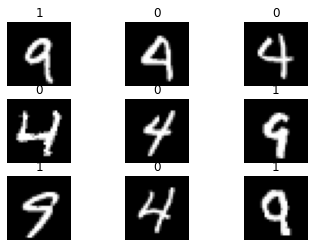

In [17]:
# Plot any 9 images from the train data along with their labels
# ** Your code here **
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(X_train[i].reshape(28,28), cmap='gray')
  plt.title('%i' % y_train[i])
  plt.axis('off')


In [18]:
# Define a simple neural network with 3 dense layers each 
# with 200 nodes and 'relu' activation
# ** Your code here **



input_layer  = tf.keras.layers.Input(shape=[28,28])
flatten_layer = tf.keras.layers.Flatten(input_shape=[28,28])(input_layer)
dense1 = tf.keras.layers.Dense(200, activation="relu")(flatten_layer)
dense2 = tf.keras.layers.Dense(200, activation="relu")(dense1)
dense3 = tf.keras.layers.Dense(200, activation="relu")(dense2)
output_layer = tf.keras.layers.Dense(1, activation='sigmoid')(dense3)

# Compile the model with binary cross entropy and Adam 
# Use accuracy as the metric
model = tf.keras.Model(input_layer, output_layer)
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model on the train and validation data for 1000 epochs 
# with batch size of 64 
history = model.fit(X_train, y_train, epochs=500, batch_size=64, validation_data=(X_val, y_val))


Epoch 1/500
2/2 [==============================] - 0s 121ms/step - loss: 31.0753 - accuracy: 0.5811 - val_loss: 26.0294 - val_accuracy: 0.6364
Epoch 2/500
2/2 [==============================] - 0s 20ms/step - loss: 30.5933 - accuracy: 0.5541 - val_loss: 7.3941 - val_accuracy: 0.6970
Epoch 3/500
2/2 [==============================] - 0s 22ms/step - loss: 6.4670 - accuracy: 0.8108 - val_loss: 10.8554 - val_accuracy: 0.5758
Epoch 4/500
2/2 [==============================] - 0s 22ms/step - loss: 4.0373 - accuracy: 0.7973 - val_loss: 3.3478 - val_accuracy: 0.7879
Epoch 5/500
2/2 [==============================] - 0s 21ms/step - loss: 0.1954 - accuracy: 0.9730 - val_loss: 6.0974 - val_accuracy: 0.7879
Epoch 6/500
2/2 [==============================] - 0s 24ms/step - loss: 1.5289 - accuracy: 0.8108 - val_loss: 5.3667 - val_accuracy: 0.8182
Epoch 7/500
2/2 [==============================] - 0s 21ms/step - loss: 0.5494 - accuracy: 0.9189 - val_loss: 3.8722 - val_accuracy: 0.7879
Epoch 8/500
2/2

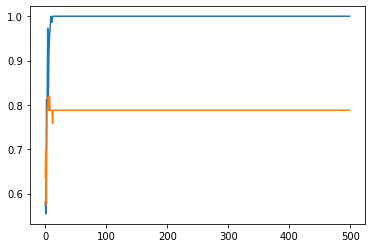

In [19]:
# Get the trace plot of the model training
# ** Your code here **
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])


In [20]:
# Compute and print the accuracy of the unregularized model
model.evaluate(X_test, y_test)

56/56 [==============================] - 0s 1ms/step - loss: 3.4939 - accuracy: 0.8452


[3.493868112564087, 0.8451576828956604]

## REGULARIZED NETWORK

Use the same model definition as given before in the unregularized definition.

Perform any type of regularization techniques (you can mix multiple methods as well) to get a better accuracy as compared to the unregularized model.

In [21]:
# Call the function get_data to get the train and test data points
X_train, X_test, y_train, y_test = get_data()


In [22]:
# Define your regularized model
# The model should be the same as the unregularized with 
# additional regularization techniques

input_layer  = tf.keras.layers.Input(shape=[28,28])
flatten_layer = tf.keras.layers.Flatten(input_shape=[28,28])(input_layer)
dense1 = tf.keras.layers.Dense(200, activation="relu")(flatten_layer)
dropout1 = tf.keras.layers.Dropout(0.5)(dense1)
dense2 = tf.keras.layers.Dense(200, activation="relu")(dropout1)
dropout2 = tf.keras.layers.Dropout(0.5)(dense2)
dense3 = tf.keras.layers.Dense(200, activation="relu")(dropout2)

output_layer = tf.keras.layers.Dense(1, activation='sigmoid')(dense3)


In [23]:
# Compile the model with binary cross entropy and Adam 
# Use accuracy as the metric
model_reg = tf.keras.Model(input_layer, output_layer)
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model_reg.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model on the train and validation data for 1000 epochs 
# with batch size of 64 
early_stop = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=20, restore_best_weights=True)
history = model_reg.fit(X_train, y_train, epochs=500, batch_size=64, validation_data=(X_val, y_val), callbacks=[early_stop])

Epoch 1/500
2/2 [==============================] - 1s 123ms/step - loss: 22.3852 - accuracy: 0.5981 - val_loss: 28.6818 - val_accuracy: 0.3939
Epoch 2/500
2/2 [==============================] - 0s 21ms/step - loss: 23.8142 - accuracy: 0.5514 - val_loss: 5.0364 - val_accuracy: 0.6667
Epoch 3/500
2/2 [==============================] - 0s 24ms/step - loss: 15.2576 - accuracy: 0.6075 - val_loss: 1.9445 - val_accuracy: 0.8485
Epoch 4/500
2/2 [==============================] - 0s 22ms/step - loss: 10.7773 - accuracy: 0.6822 - val_loss: 1.7628 - val_accuracy: 0.8182
Epoch 5/500
2/2 [==============================] - 0s 22ms/step - loss: 5.2477 - accuracy: 0.7570 - val_loss: 1.5078 - val_accuracy: 0.8182
Epoch 6/500
2/2 [==============================] - 0s 22ms/step - loss: 6.7257 - accuracy: 0.7290 - val_loss: 1.4910 - val_accuracy: 0.8485
Epoch 7/500
2/2 [==============================] - 0s 24ms/step - loss: 7.5194 - accuracy: 0.7290 - val_loss: 0.9339 - val_accuracy: 0.9091
Epoch 8/500
2/

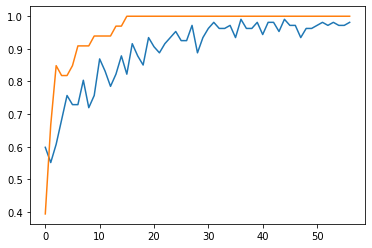

In [24]:
# Get the trace plot of the model training
# ** Your code here **
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])


In [25]:
# Compute and print the accuracy of the regularized model
model_reg.evaluate(X_test, y_test)

56/56 [==============================] - 0s 1ms/step - loss: 0.9940 - accuracy: 0.9352


[0.9939794540405273, 0.9352477192878723]

## REGULARIZATION USING DATA AUGMENTATION

In [26]:
# Get the train and test data by calling the get_data function
X_train, X_test, y_train, y_test = get_data()


In [27]:
# Reshape the train and test data
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

# Convert from int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Perform data augmentation by calling the ImageDataGenerator function
# with appropriate transformation values
datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=45,
    width_shift_range=.15,
    height_shift_range=.15,
    horizontal_flip=False,
    zoom_range=0.5,
    validation_split=0.2
)


In [28]:
# Fit the generator on the train data using the train data 
# and 'training' subset
train_generator = datagen.flow(X_train, y_train, batch_size=64, subset='training')

# Fit the generator on the train data using the train data and 
# 'validation' subset
validation_generator = datagen.flow(X_train, y_train, batch_size=64, subset='validation')


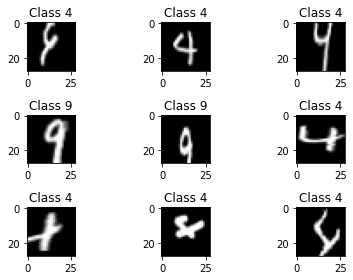

In [29]:
# Helper code to visualize some generated data
im = train_generator.next()

for i in range(9):

  # define subplot
  plt.subplot(330 + 1 + i)
  
  # plot raw pixel data
  plt.imshow(im[0][i].squeeze(), cmap=plt.get_cmap('gray'))
  if im[1][i]==0:
    label = "Class 4"
  else:
    label="Class 9"
  plt.title(label)

# show the figure
plt.tight_layout()
plt.show()

In [30]:
# Define your neural network model with the same definition 
# as in the unregularized model and apply appropriate regularization methods
input_layer  = tf.keras.layers.Input(shape=[28,28,1])
flatten_layer = tf.keras.layers.Flatten(input_shape=[28,28])(input_layer)
dense1 = tf.keras.layers.Dense(200, activation="relu")(flatten_layer)
dropout1 = tf.keras.layers.Dropout(0.5)(dense1)
dense2 = tf.keras.layers.Dense(200, activation="relu")(dropout1)
dropout2 = tf.keras.layers.Dropout(0.5)(dense2)
dense3 = tf.keras.layers.Dense(200, activation="relu")(dropout2)

output_layer = tf.keras.layers.Dense(1, activation='sigmoid')(dense3)

# Compile the model with binary cross entropy and Adam 
# Use accuracy as the metric
model_reg_aug = tf.keras.Model(input_layer, output_layer)
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model_reg_aug.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model on the train and validation data for 1000 epochs 
# with batch size of 64 
# early_stop = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=20, restore_best_weights=True)
history = model_reg_aug.fit(train_generator, epochs=500, batch_size=64, validation_data=validation_generator)


Epoch 1/500
2/2 [==============================] - 1s 153ms/step - loss: 0.7358 - accuracy: 0.4535 - val_loss: 0.7111 - val_accuracy: 0.3810
Epoch 2/500
2/2 [==============================] - 0s 57ms/step - loss: 0.6928 - accuracy: 0.4651 - val_loss: 0.6998 - val_accuracy: 0.3810
Epoch 3/500
2/2 [==============================] - 0s 46ms/step - loss: 0.7053 - accuracy: 0.4884 - val_loss: 0.6834 - val_accuracy: 0.5238
Epoch 4/500
2/2 [==============================] - 0s 46ms/step - loss: 0.6899 - accuracy: 0.5116 - val_loss: 0.6807 - val_accuracy: 0.6190
Epoch 5/500
2/2 [==============================] - 0s 46ms/step - loss: 0.7212 - accuracy: 0.5233 - val_loss: 0.7098 - val_accuracy: 0.5238
Epoch 6/500
2/2 [==============================] - 0s 47ms/step - loss: 0.7112 - accuracy: 0.4884 - val_loss: 0.7009 - val_accuracy: 0.4762
Epoch 7/500
2/2 [==============================] - 0s 46ms/step - loss: 0.7031 - accuracy: 0.4767 - val_loss: 0.6963 - val_accuracy: 0.4762
Epoch 8/500
2/2 [==

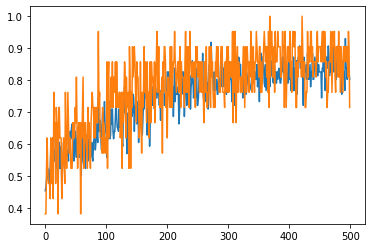

In [31]:
# Visualize the trace-plot
# Get the trace plot of the model training
# ** Your code here **
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

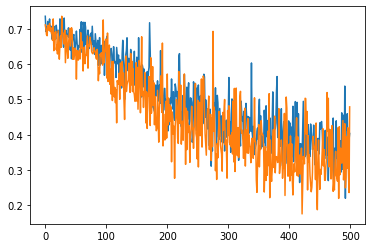

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [33]:
# Evaluate the accuracy of the model on the test data
model_reg_aug.evaluate(X_test, y_test)

56/56 [==============================] - 0s 1ms/step - loss: 9.3368 - accuracy: 0.9527


[9.336817741394043, 0.9527027010917664]